## Food Allergen Prediction 

In [79]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [80]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [81]:
#Importing dataset
df=pd.read_csv('food_ingredients_and_allergens.csv')
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


### Phase 1: Dataset Selection and Preprocessing

In [82]:
df.columns.tolist()

['Food Product',
 'Main Ingredient',
 'Sweetener',
 'Fat/Oil',
 'Seasoning',
 'Allergens',
 'Prediction']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        399 non-null    object
 3   Fat/Oil          399 non-null    object
 4   Seasoning        399 non-null    object
 5   Allergens        399 non-null    object
 6   Prediction       398 non-null    object
dtypes: object(7)
memory usage: 21.9+ KB


In [84]:
df.describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
count,399,399,399,399,399,399,398
unique,259,101,10,36,186,40,2
top,Stuffed Bell Peppers,Chicken,None,Olive oil,None,None,Contains
freq,4,61,280,90,20,148,255


<Axes: >

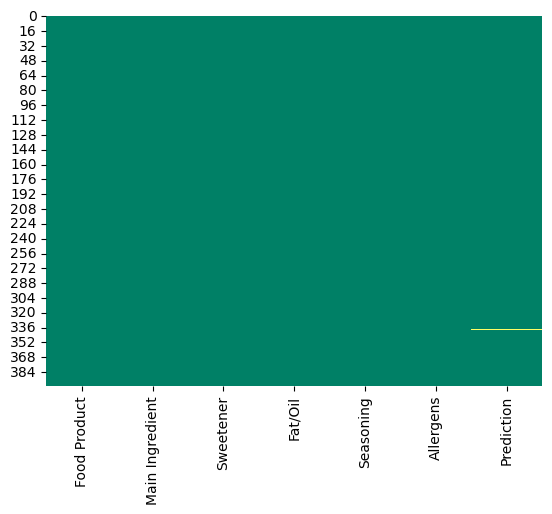

In [85]:
sns.heatmap(df.isnull(), cmap='summer', cbar=False)

In [86]:
df[df['Prediction'].isnull()]

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
338,Baked Ziti,Pasta,None,Cheese,Tomato sauce,"Wheat, Dairy",NaN


In [87]:
# Picking the right value to fill the Prediction value
df[df['Allergens'].str.contains('Wheat') & df['Allergens'].str.contains('Dairy')][['Allergens', 'Prediction']].mode()

,Allergens,Prediction
0,"Wheat, Dairy",Contains


In [88]:
# Replacing missing value in 'Prediction' column with "Contains"
df['Prediction'] = df['Prediction'].fillna("Contains")

In [89]:
df.isnull().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         0
dtype: int64

### Phase 2: Exploratory Data Analysis (before encoding)

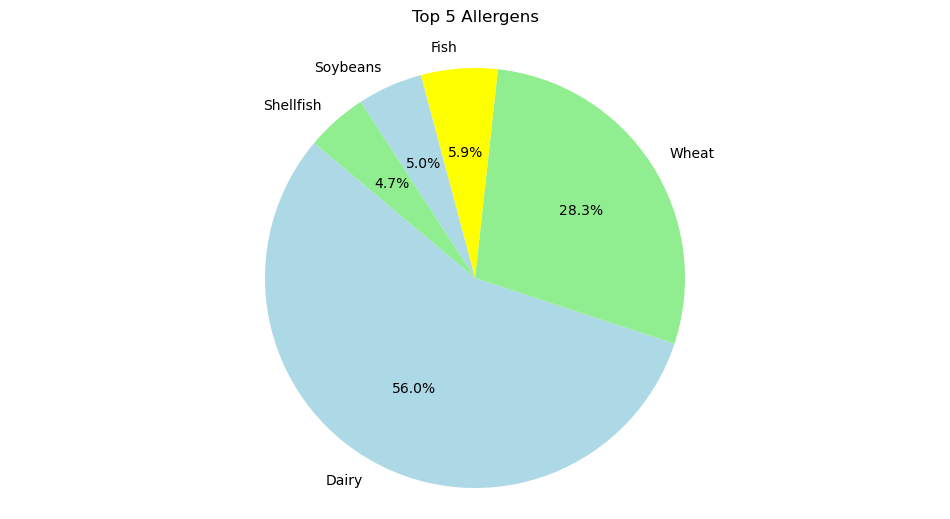

In [90]:
# Analyzing top 5 allergens

contains_df = df[df['Prediction'] == 'Contains']
allergen_counts = contains_df['Allergens'].str.split(', ', expand=True).stack().value_counts()

top_5_allergens = allergen_counts.head(5)

plt.figure(figsize=(12, 6))
plt.pie(top_5_allergens, labels=top_5_allergens.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','lightgreen','yellow'])
plt.title('Top 5 Allergens\n')
plt.axis('equal')
plt.show()

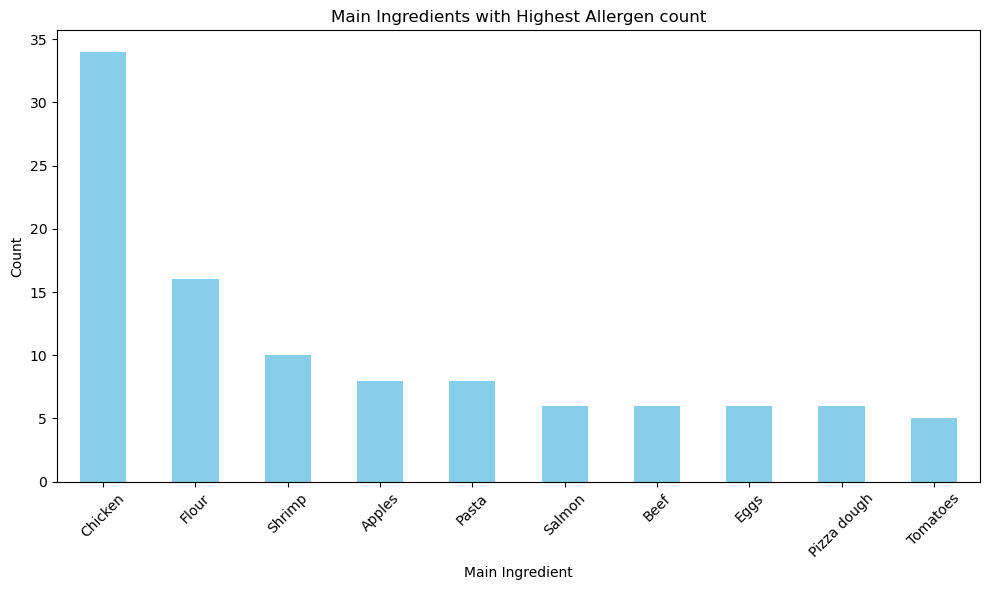

In [91]:
# Analyzing the main ingredients which has highest allergy counts

contains_df = df[df['Prediction'] == 'Contains']
ingredient_counts = contains_df['Main Ingredient'].value_counts()

plt.figure(figsize=(10, 6))
ingredient_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Main Ingredients with Highest Allergen count')
plt.xlabel('Main Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
# Finding Associations between features

#Finding most common combinations of Sweetners and Fat/Oils which has Allergens
df_unique = df[df['Prediction']=='Contains'].drop_duplicates(subset=['Sweetener', 'Fat/Oil'])
df_unique.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
7,Caesar Salad,Romaine lettuce,None,Olive oil,Parmesan cheese,Dairy,Contains
8,Caesar Wrap,Grilled chicken,None,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,Contains


In [93]:
# Count the occurrences of each combination
combination_counts = df_unique.groupby(['Sweetener', 'Fat/Oil']).size().reset_index(name='Count')
combination_counts.head()

,Sweetener,Fat/Oil,Count
0,Brown sugar,Butter,1
1,Brown sugar,Vegetable oil,1
2,Cocoa butter,Milk powder,1
3,Honey,Mustard,1
4,Honey,None,1


In [94]:
combination_matrix = combination_counts.pivot('Sweetener', 'Fat/Oil','Count')

/var/folders/7z/352wq1t514qd0rqdn_k74l140000gn/T/ipykernel_1107/3309827577.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  combination_matrix = combination_counts.pivot('Sweetener', 'Fat/Oil','Count')


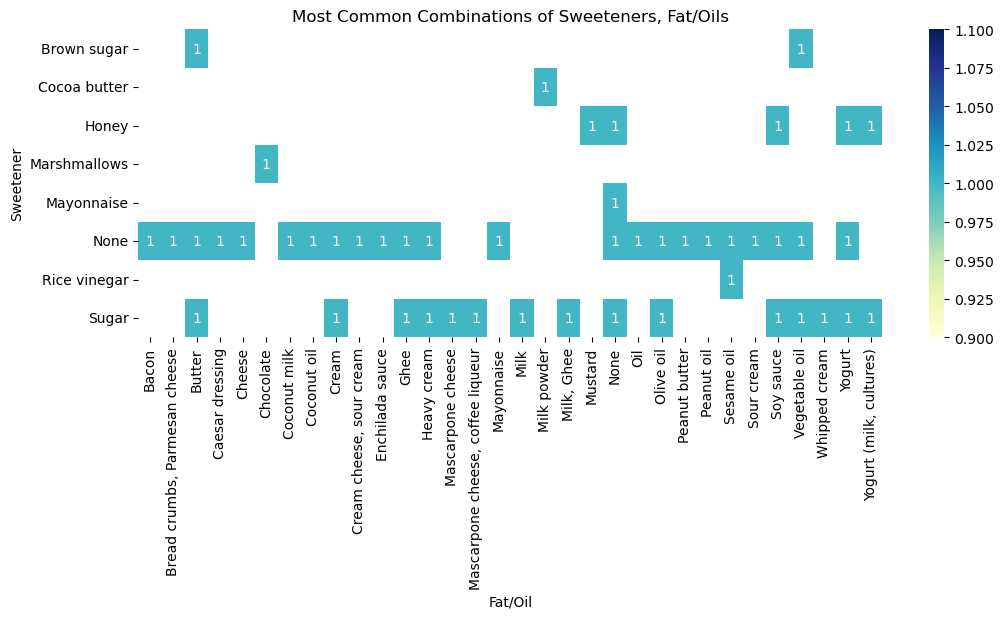

In [95]:
# Plotting the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(combination_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Most Common Combinations of Sweeteners, Fat/Oils')
plt.xlabel('Fat/Oil')
plt.ylabel('Sweetener')
plt.show()

/var/folders/7z/352wq1t514qd0rqdn_k74l140000gn/T/ipykernel_1107/3301045759.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  combination_matrix = combination_counts[:5].pivot('Seasoning', 'Fat/Oil','Count')


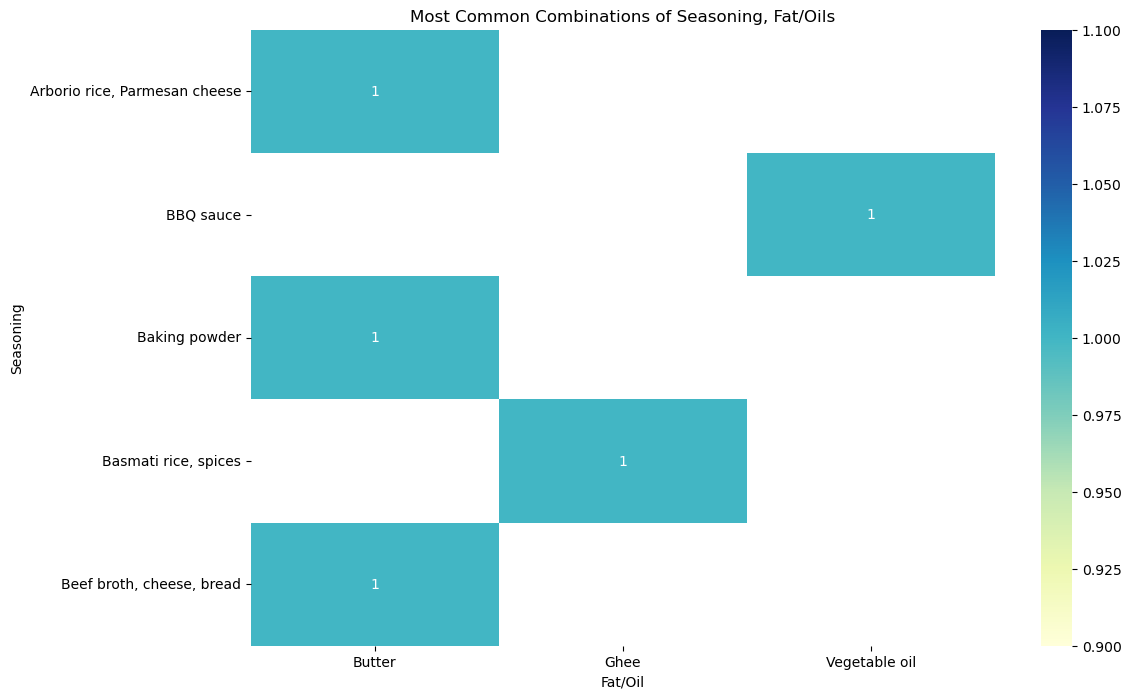

In [96]:
# Finding Associations between features- 2

#Finding most common combinations of Seasoning and Fat/Oils which has Allergens
df_unique = df[df['Prediction']=='Contains'].drop_duplicates(subset=['Seasoning', 'Fat/Oil'])

combination_counts = df_unique.groupby(['Seasoning', 'Fat/Oil']).size().reset_index(name='Count')
combination_matrix = combination_counts[:5].pivot('Seasoning', 'Fat/Oil','Count')

plt.figure(figsize=(12, 8))
sns.heatmap(combination_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Most Common Combinations of Seasoning, Fat/Oils')
plt.xlabel('Fat/Oil')
plt.ylabel('Seasoning')
plt.show()

### Encoding

#### Using Label Encoding for "Prediction" 

In [97]:
# Using Label Encoding for "Prediction" 
LE=LabelEncoder()
df['Prediction']=LE.fit_transform(df['Prediction'])

#### Frequency Encoding for the rest of the categorical variables

In [98]:
# Frequency Encoding for the rest of the categorical variables

def frequency_encode(column):
    frequency_map = df[column].value_counts(normalize=True).to_dict()
    df[column+' Frequency'] = df[column].map(frequency_map)

categorical_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']
for column in categorical_columns:
    frequency_encode(column)

# Dropping the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

df.head()

,Prediction,Food Product Frequency,Main Ingredient Frequency,Sweetener Frequency,Fat/Oil Frequency,Seasoning Frequency,Allergens Frequency
0,0,0.005013,0.005013,0.230576,0.213033,0.027569,0.005013
1,0,0.005013,0.005013,0.230576,0.213033,0.027569,0.005013
2,0,0.010025,0.005013,0.701754,0.145363,0.027569,0.005013
3,0,0.010025,0.005013,0.701754,0.145363,0.027569,0.005013
4,0,0.002506,0.007519,0.701754,0.145363,0.027569,0.208020


In [99]:
df.columns.tolist()

['Prediction',
 'Food Product Frequency',
 'Main Ingredient Frequency',
 'Sweetener Frequency',
 'Fat/Oil Frequency',
 'Seasoning Frequency',
 'Allergens Frequency']

### Phase 2: Feature Selection

In [100]:
df.describe()

,Prediction,Food Product Frequency,Main Ingredient Frequency,Sweetener Frequency,Fat/Oil Frequency,Seasoning Frequency,Allergens Frequency
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.358396,0.004780,0.036815,0.546812,0.136890,0.011350,0.216023
std,0.480131,0.002210,0.050489,0.242938,0.084377,0.012226,0.139042
min,0.000000,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506
25%,0.000000,0.002506,0.007519,0.230576,0.067669,0.005013,0.180451
50%,0.000000,0.005013,0.015038,0.701754,0.145363,0.007519,0.208020
75%,1.000000,0.005013,0.035088,0.701754,0.213033,0.012531,0.370927
max,1.000000,0.010025,0.152882,0.701754,0.225564,0.050125,0.370927


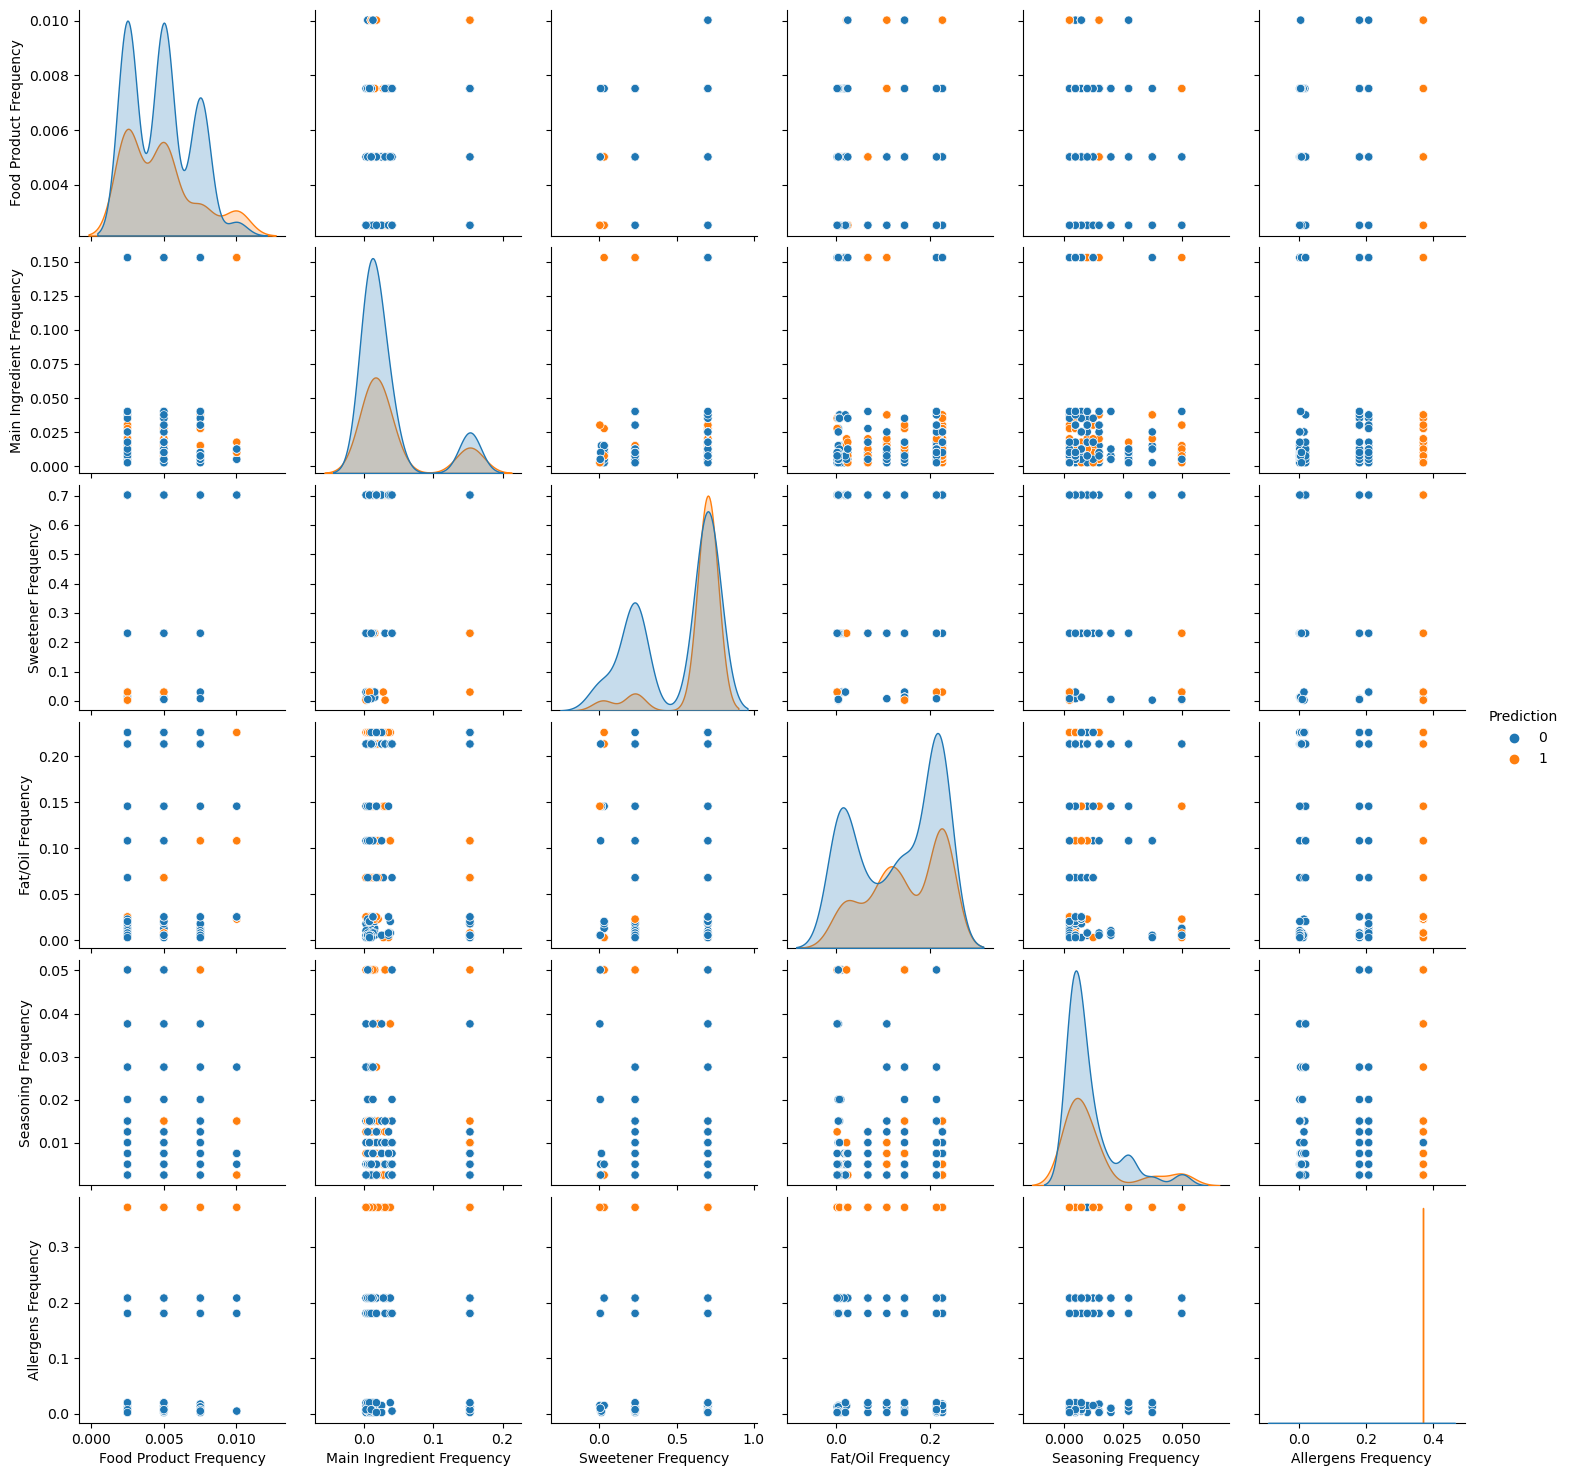

In [101]:
sns.pairplot(df,hue='Prediction')
plt.show()

In [102]:
(df['Prediction'].value_counts())/len(df) *100

0    64.160401
1    35.839599
Name: Prediction, dtype: float64

#### Feature Selection and Elimination

In [103]:
#Feature Selection and Elimination
Corr=df.corr()

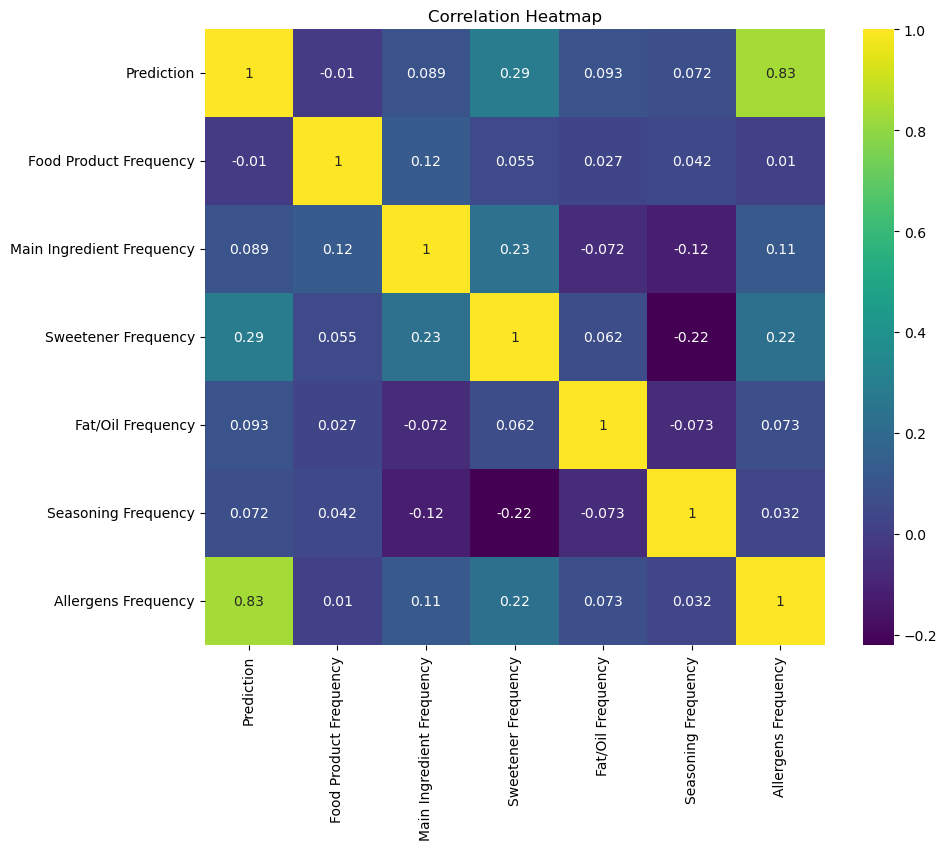

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

#### Observations:
- Prediction and Allergen Frequency have high correlation with a coefficient of 0.83
- Prediction and Sweetener Frequency have a correlation with coefficient of 0.28 
- Sweetner Frequency and Allergens Frequency have a correlation with coefficient of 0.22

- Food Product Frequency: Correlation coefficients with other features are generally low (absolute values mostly below 0.2), but it might still have some correlation with 'Main Ingredient Frequency' (0.122824).
- Main Ingredient Frequency: Similar to 'Food Product Frequency', correlations with other features are generally low (absolute values mostly below 0.2), but it has a slightly higher correlation with 'Sweetener Frequency' (0.230460).
- Fat/Oil Frequency: Correlation coefficients with other features are generally low (absolute values mostly below 0.2).
- Seasoning Frequency: Correlation coefficients with other features are generally low (absolute values mostly below 0.2).
- Allergens Frequency: Highly correlated with 'Prediction' (0.833702), but correlations with other features are generally low (absolute values mostly below 0.2).


##### Decided not to drop any features as the accuracy is decreasing when dropped

### Phase 3: Model Implementation and Baseline Evaluation

In [105]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Prediction'])
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logistic_regression_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

logistic_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Accuracy before hyperparamter Tuning
logistic_regression_accuracy = logistic_regression_model.score(X_test, y_test)
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Accuracy before hyperparamter Tuning:")
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Accuracy before hyperparamter Tuning:
Logistic Regression Accuracy: 0.9375
Decision Tree Accuracy: 0.9375
Random Forest Accuracy: 0.975


In [107]:
from sklearn.metrics import classification_report, roc_auc_score

logistic_regression_predictions = logistic_regression_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_regression_predictions))

print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_predictions))

# ROC-AUC score
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_predictions)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_predictions)

print("Logistic Regression ROC-AUC Score:", logistic_regression_roc_auc)
print("Decision Tree ROC-AUC Score:", decision_tree_roc_auc)
print("Random Forest ROC-AUC Score:", random_forest_roc_auc)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.95      0.82      0.88        22

    accuracy                           0.94        80
   macro avg       0.94      0.90      0.92        80
weighted avg       0.94      0.94      0.94        80

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.95      0.82      0.88        22

    accuracy                           0.94        80
   macro avg       0.94      0.90      0.92        80
weighted avg       0.94      0.94      0.94        80

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        22

    accuracy                           0.97        80
   macro av

### Phase 4: Hyperparameter Tuning

In [108]:
#Using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],               
    'C': [0.001, 0.01, 0.1, 1, 10]   
}

logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)
random_search = RandomizedSearchCV(estimator=logistic_regression_model, param_distributions=param_grid, 
                                   n_iter=10, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)


random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_s

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

decision_tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

y_pred_test = random_search.best_estimator_.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_d

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

y_pred_test = random_search.best_estimator_.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimator

In [111]:
#GridSearchCV by fitting the grid search to the training data from RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],               
    'C': [0.001, 0.01, 0.1, 1, 10]   
}

logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=2, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None,

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

decision_tree_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_forest_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimato

### Phase 5: Model Evaluation and Comparative Analysis

In [114]:
from sklearn.metrics import classification_report
print("After Hyperparameter Tuning:")
# After Hyperparameter Tuning: Logistic Regression Classification Report
logistic_regression_report = classification_report(y_test, best_model.predict(X_test))
print("Logistic Regression Classification Report:")
print(logistic_regression_report)

# After Hyperparameter Tuning: Decision Tree Classification Report
decision_tree_report = classification_report(y_test, random_search.best_estimator_.predict(X_test))
print("\nDecision Tree Classification Report:")
print(decision_tree_report)

# After Hyperparameter Tuning: Random Forest Classification Report
random_forest_report = classification_report(y_test, random_search.best_estimator_.predict(X_test))
print("\nRandom Forest Classification Report:")
print(random_forest_report)


After Hyperparameter Tuning:
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        22

    accuracy                      

In [115]:
# After Hyperparameter Tuning: Calculating ROC curve and ROC-AUC score

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

logistic_regression_probs = best_model.predict_proba(X_test)[:, 1]
decision_tree_probs = random_search.best_estimator_.predict_proba(X_test)[:, 1]
random_forest_probs = random_search.best_estimator_.predict_proba(X_test)[:, 1]

logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_probs)
logistic_regression_roc_auc = roc_auc_score(y_test, logistic_regression_probs)

decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_probs)

random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_probs)

print("Logistic Regression ROC-AUC Score:", logistic_regression_roc_auc)
print("Decision Tree ROC-AUC Score:", decision_tree_roc_auc)
print("Random Forest ROC-AUC Score:", random_forest_roc_auc)

Logistic Regression ROC-AUC Score: 0.9968652037617555
Decision Tree ROC-AUC Score: 0.9976489028213166
Random Forest ROC-AUC Score: 0.9976489028213166


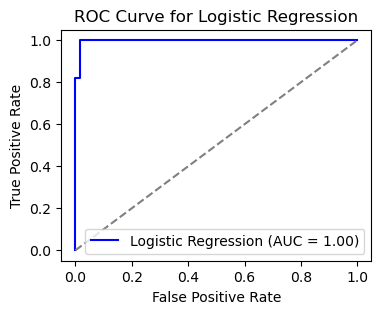

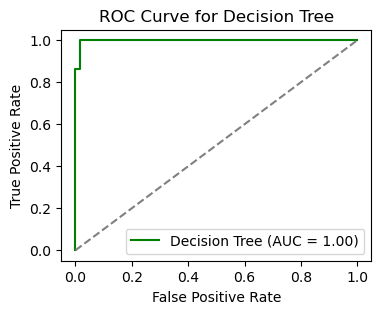

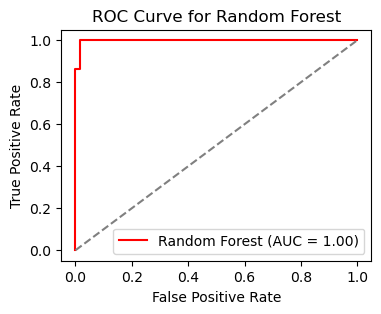

In [116]:

plt.figure(figsize=(4, 3))
plt.plot(logistic_regression_fpr, logistic_regression_tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(logistic_regression_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(decision_tree_fpr, decision_tree_tpr, color='green', label='Decision Tree (AUC = {:.2f})'.format(decision_tree_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(random_forest_fpr, random_forest_tpr, color='red', label='Random Forest (AUC = {:.2f})'.format(random_forest_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


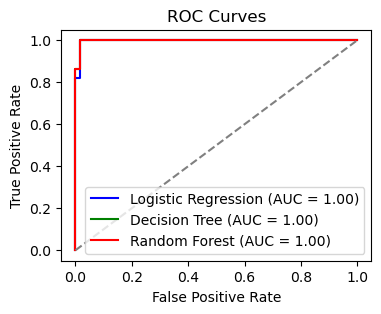

[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=40, max_feature

In [117]:
plt.figure(figsize=(4, 3))

plt.plot(logistic_regression_fpr, logistic_regression_tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(logistic_regression_roc_auc))
plt.plot(decision_tree_fpr, decision_tree_tpr, color='green', label='Decision Tree (AUC = {:.2f})'.format(decision_tree_roc_auc))
plt.plot(random_forest_fpr, random_forest_tpr, color='red', label='Random Forest (AUC = {:.2f})'.format(random_forest_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


### Comparative Analysis

Based on the classification reports and ROC-AUC scores, the in-depth comparative analysis of the Logistic Regression, Decision Tree, and Random Forest models is :

1. **Accuracy and Performance Metrics:**
    - All three models (Logistic Regression, Decision Tree, and Random Forest) exhibit high accuracy and performance across all classes (0 and 1) as indicated by precision, recall, and F1-score values.
    - For both classes (0 and 1), precision, recall, and F1-score are consistently high, indicating that the models perform well in correctly identifying both positive and negative instances.
    - The macro and weighted average F1-scores are also high, indicating balanced performance across classes and dataset imbalance.
    
2. **ROC-AUC Score:**
    - The ROC-AUC score provides a measure of the overall performance of the model across different thresholds.
    - All three models have high ROC-AUC scores close to 1, indicating excellent performance in distinguishing between positive and negative classes.
    - The Logistic Regression model has a slightly lower ROC-AUC score compared to the Decision Tree and Random Forest models, but the difference is minimal.

3. **Interpretability and Complexity:**
    - Logistic Regression: It is a simple and interpretable model, making it easy to understand the impact of each feature on the prediction. It is suitable for scenarios where interpretability is essential.
    - Decision Tree: Decision trees are also interpretable and provide insights into feature importance. However, they can become complex with deep trees, leading to overfitting.
    - Random Forest: Random Forest improves upon Decision Trees by reducing overfitting through ensemble learning. However, it sacrifices some interpretability due to the aggregation of multiple decision trees.

4. **Scalability and Computational Efficiency:**
    - Logistic Regression: Generally, logistic regression models are computationally efficient and can handle large datasets efficiently. They are suitable for real-time prediction and scenarios with limited computational resources.
    - Decision Tree: Training decision trees can be computationally expensive, especially for large datasets or deep trees. However, prediction time is usually fast once the tree is trained.
    - Random Forest: Random Forest models can be computationally expensive to train due to the ensemble of multiple decision trees. However, they often provide better generalization performance compared to individual decision trees.
5. **Robustness to Outliers and Noise:**
    - Logistic Regression: It is sensitive to outliers and noise in the data, which can affect its performance.
    - Decision Tree: Decision trees are robust to outliers and noise to some extent, but they can be prone to overfitting, especially with noisy data.
    - Random Forest: Random Forest is more robust to outliers and noise compared to individual decision trees due to the aggregation of multiple trees.

6. **Applicability:**
    - Logistic Regression: Suitable for binary classification tasks with linear decision boundaries. It is commonly used in areas such as finance, healthcare, and social sciences.
    - Decision Tree: Suitable for both classification and regression tasks and can handle categorical and numerical data. It is used in various domains such as healthcare, finance, and customer relationship management.
    - Random Forest: Widely used for classification and regression tasks, especially in scenarios where interpretability is not a primary concern, and high predictive accuracy is desired.


### Phase 6: Conclusion and Recommendations

**Conclusion:**

In this project, I conducted a comprehensive analysis of three different machine learning algorithms - Logistic Regression, Decision Tree, and Random Forest - for food allergen prediction. I began by preprocessing the dataset, encoding categorical variables, and performing exploratory data analysis. Then, I implemented the models, evaluated their performance using various metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. After hyperparameter tuning, I compared the performance, computational efficiency, and applicability of each algorithm.

**Findings and Insights:**

- All three models demonstrated high accuracy, precision, recall, and F1-score across both classes (0 and 1), indicating their effectiveness in predicting food allergens.
- The ROC-AUC scores were also high for all models, indicating their ability to distinguish between positive and negative classes with minimal misclassification.
- Logistic Regression and Decision Tree models are interpretable and suitable for scenarios where model transparency and feature importance interpretation are crucial.
- Random Forest, while sacrificing some interpretability, provides better generalization performance by reducing overfitting through ensemble learning.
- Logistic Regression is computationally efficient and suitable for real-time prediction tasks, while Decision Tree and Random Forest models may be more computationally expensive to train due to their tree-based nature.
- Decision Tree and Random Forest models are robust to outliers and noise, making them suitable for datasets with noisy features.

**Recommendations:**

Based on the findings and insights gained from the comparative analysis, the following recommendations are provided:

1. For scenarios where model interpretability is critical and computational resources are limited, Logistic Regression may be the most suitable choice due to its simplicity, interpretability, and computational efficiency.
2. If interpretability is still important but higher predictive accuracy is desired, Decision Tree could be a good compromise. It provides insights into feature importance while offering reasonable performance.
3. For applications where high predictive accuracy is paramount and computational resources allow, Random Forest may be the preferred choice. It provides excellent generalization performance by aggregating multiple decision trees, making it robust to overfitting and noise.

Ultimately, the choice of algorithm depends on the specific requirements of the problem, the trade-off between interpretability and predictive accuracy, and the available computational resources. It is recommended to experiment with multiple algorithms and evaluate their performance thoroughly before making a final decision.